### Sentences in lists:

In [17]:
all_sentences = [
    ["light", [
        "Why did the photon check a bag at the airport? It didn’t—it was traveling light!",
        "The light from the sunset filled the room with warmth.",
        "The flickering light of the candle created a cozy atmosphere.",
        "The suitcase was so light I thought it was empty.",
        "Even after packing everything I needed, my backpack still felt surprisingly light."
    ]],
    
    ["dog", [
        "Why does a dog sit in the shade? Because it doesn’t want to be a hot dog!",
        "The place makes the best hot dog in town.",
        "I ordered a hot dog with all the toppings from the food truck.",
        "The dog’s bark woke up the entire neighborhood.",
        "The dog ran joyfully in the park, chasing after a ball."
    ]],
    
    ["interest", [
        "Why did the bank teller quit his job? He lost interest!",
        "His interest in space travel has always been strong.",
        "She shared his interest in exploring the mysteries of the universe.",
        "Mortgage interest rates have risen in recent months.",
        "The interest on her student loan was much higher than she anticipated."
    ]],
    
    ["seal", [
        "Why did the seal go to the Tupperware party? It heard it was airtight!",
        "The seal on the letter was very elegant.",
        "The detective inspected the seal carefully for any signs of tampering.",
        "The seal entertained the crowd with its clever tricks.",
        "The playful seal dived into the water, splashing the onlookers."
    ]],
    
    ["spring", [
        "Why did the mattress start a band? It had excellent spring support!",
        "The spring water was crystal clear and refreshing.",
        "Hikers often stopped at the spring to fill their bottles with fresh water.",
        "I slept on the spring mattress in my grandmother's country house",
        "The spring in the old sofa creaked loudly whenever someone sat down."
    ]],
    
    ["lead", [
        "Why don’t pencils ever win races? They’re always out of lead!",
        "She decided to lead the group through the maze.",
        "The teacher encouraged her to lead the discussion during the class.",
        "The pencil’s lead broke right in the middle of my sketch.",
        "I sharpened the pencil carefully to restore its broken lead."
    ]],

    ["match", [
        "The dating app matched me with a candle who immediately asked for a match.",
        "The football match between the rivals had an electrifying atmosphere.",
        "My daughter is training for an important tennis match.",
        "As I did not have a lighter, I lighted a sigarette with a match.",
        "The match burned my fingers because I wasn't quick enough."
    ]],
    
    ["convert", [
        "Did you know that PDF has become the most widely practiced religion? If you type \"How do I convert to\" into Google, the top suggestion is PDF—followed by Judaism, Islam, and Christianity.",
        "Recently, he said he wants to convert himself to Judaism.",
        "After years of contemplation, she decided to convert to Buddhism.",
        "Computer question. I have a Word file, how can I convert it to PDF?",
        "The software can easily convert video files into different formats."
    ]]

]


In [18]:
all_sentences

[['light',
  ['Why did the photon check a bag at the airport? It didn’t—it was traveling light!',
   'The light from the sunset filled the room with warmth.',
   'The flickering light of the candle created a cozy atmosphere.',
   'The suitcase was so light I thought it was empty.',
   'Even after packing everything I needed, my backpack still felt surprisingly light.']],
 ['dog',
  ['Why does a dog sit in the shade? Because it doesn’t want to be a hot dog!',
   'The place makes the best hot dog in town.',
   'I ordered a hot dog with all the toppings from the food truck.',
   'The dog’s bark woke up the entire neighborhood.',
   'The dog ran joyfully in the park, chasing after a ball.']],
 ['interest',
  ['Why did the bank teller quit his job? He lost interest!',
   'His interest in space travel has always been strong.',
   'She shared his interest in exploring the mysteries of the universe.',
   'Mortgage interest rates have risen in recent months.',
   'The interest on her student lo

In [15]:
def get_shape(lst):
    if isinstance(lst, list):
        # If the current element is a list, recursively calculate its shape
        return [len(lst)] + get_shape(lst[0]) if lst else [0]
    return []

In [16]:
print(get_shape(all_sentences))

[8, 2]


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
from huggingface_hub import login
from sklearn.decomposition import PCA
import math 
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [3]:
#huggingface_token = ...
login(token=huggingface_token)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")



In [4]:

# Function to extract embeddings from a BERT model
def sentences2embeddings(sentences, verbose = False):
    embeddings_all_sentences = []
    
    # Tokenize and process each sentence
    for sentence in sentences:
        if verbose == True: 
            print("Calculating the embeddings of: ", sentence)
            print()
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
        
        # Forward pass through the model
        outputs = model(**inputs, output_hidden_states=True)
    
        # Extract token embeddings from the last hidden layer
        tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
        if verbose == True: 
            print("tokens: ", tokens)
            print()
    
        # Extract embeddings from the last hidden layer
        embeddings = outputs.hidden_states[-1][0]  # Shape: [seq_len, hidden_dim]
    
        token_embeddings_pairs = {}
        for token, embedding in zip(tokens, embeddings):
            # Create the dictionary of token and its embedding
            token_embeddings_pairs[token] = embedding.tolist()
    
        embeddings_all_sentences.append(token_embeddings_pairs)
        
    return embeddings_all_sentences



In [5]:
def vis_points(data):

    x = data[:, 0]
    y = data[:, 1]
    z = data[:, 2]
    
    labels=[]
    for i in range (len(data)):
        labels.append(str(i+1))
    
    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='b', marker='o')
    for i, label in enumerate(labels):
        ax.text(x[i], y[i], z[i], label, fontsize=10, color='blue')
    
    # Show plot
    plt.show()

In [6]:
# Returns a numpy array with the the embedding vectors of the same word in different sentences
def find_embeddings_word_in_different_sentences(sentences, word, verbose = False):

    # Calculate embeddings of words for each sentence
    embeddings_all_sentences = sentences2embeddings(sentences)

    # The space is replaced with "▁" (NOTE: not "_", they are different ASCII codes) so each token of a new word starts with it 
    #word2lookfor = "▁" + word
    word2lookfor = word
    
    # the first five numbers of the embedding vectors of the word bank within each sentence
    if verbose == True: 
        print ("The different embedding vectors (first 5 elements) of the word \"" + word + "\"")
        for i in range(len(embeddings_all_sentences)):
            print (embeddings_all_sentences[i][word2lookfor][:5])

    # Put the embeddings of the words in a list of lists:
    embeddings_all_sentences_list = [embeddings_all_sentences[0][word2lookfor]]
    for i in range (1, len(embeddings_all_sentences)):
        embeddings_all_sentences_list.append(embeddings_all_sentences[i][word2lookfor])
    
    # Convert it to numpy array: 4 lines for 4096 elements each (i.e. the length of the embedding vector of a word)
    embeddings_all_sentences_array = np.array(embeddings_all_sentences_list, dtype='float32')

    return embeddings_all_sentences_array
    




In [7]:
# Reduce dimensionality with PCA to visualise the array in a 3d graph
def array2pca(embeddings_all_sentences_array):

    pca = PCA(n_components=3)
    embeddings_all_sentences_array_pca = pca.fit_transform(embeddings_all_sentences_array)
    return embeddings_all_sentences_array_pca
    

In [8]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


In [9]:
def show_meaning_distances_euclidean(embeddings_all_sentences_array, word):
    printmd ("**Euclidean distance between embedding vectors of the word \""+word+"\" in sentences:**")
    labels=[]
    for i in range (len(embeddings_all_sentences_array)):
        labels.append(str(i+1))
    
    for i in range (len(embeddings_all_sentences_array)):
        j_list = range(i, len(embeddings_all_sentences_array))
        j_list = [*j_list]
        j_list.remove(i)
        for j in j_list:
            if (i+1==2 and j+1==3) or (i+1==4 and j+1==5):
                printmd(f"**{labels[i]} and {labels[j]}: {np.linalg.norm(embeddings_all_sentences_array[i] - embeddings_all_sentences_array[j]):.2f}**")
            else:
                printmd(f"{labels[i]} and {labels[j]}: {np.linalg.norm(embeddings_all_sentences_array[i] - embeddings_all_sentences_array[j]):.2f}")

In [10]:
def show_meaning_similarities_euclidean(embeddings_all_sentences_array, word):
    epsilon = 0.0001
    printmd ("**Similarity between embedding vectors of the word \""+word+"\" (based on opposite of Euclidean distance) in sentences:**")
    labels=[]
    for i in range (len(embeddings_all_sentences_array)):
        labels.append(str(i+1))
    
    for i in range (len(embeddings_all_sentences_array)):
        j_list = range(i, len(embeddings_all_sentences_array))
        j_list = [*j_list]
        j_list.remove(i)
        for j in j_list:
            euclidean_distance = np.linalg.norm(embeddings_all_sentences_array[i] - embeddings_all_sentences_array[j])
            similarity = 1 / (euclidean_distance + epsilon) *100
            if (i+1==2 and j+1==3) or (i+1==4 and j+1==5):
                printmd(f"**{labels[i]} and {labels[j]}: {similarity:.2f}**")
            else:
                printmd(f"{labels[i]} and {labels[j]}: {similarity:.2f}")



In [11]:
def show_meaning_similarities_cosine(embeddings_all_sentences_array, word):
    printmd ("**Cosine similarity between embedding vectors of the word \""+word+"\" (range: -1 for opposite meaning, +1 for very similar) in sentences:**")
    labels=[]
    for i in range (len(embeddings_all_sentences_array)):
        labels.append(str(i+1))
    
    for i in range (len(embeddings_all_sentences_array)):
        j_list = range(i, len(embeddings_all_sentences_array))
        j_list = [*j_list]
        j_list.remove(i)
        for j in j_list:
            if (i+1==2 and j+1==3) or (i+1==4 and j+1==5):
                printmd(f"**{labels[i]} and {labels[j]}: {math.cos(angle_between(embeddings_all_sentences_array[i], embeddings_all_sentences_array[j])):.2f}**")
            else:
                printmd(f"{labels[i]} and {labels[j]}: {math.cos(angle_between(embeddings_all_sentences_array[i], embeddings_all_sentences_array[j])):.2f}")


In [12]:
def analyse_word_in_sentences(sentences, word):
    # calculate embeddings
    embeddings_all_sentences_array = find_embeddings_word_in_different_sentences(sentences, word)

    # calculate pca for visualization
    embeddings_all_sentences_array_pca = array2pca(embeddings_all_sentences_array)

    # visualize
    vis_points(embeddings_all_sentences_array_pca)

    # calculate distance between points
    show_meaning_similarities_euclidean(embeddings_all_sentences_array, word)
    print ()
    show_meaning_similarities_cosine(embeddings_all_sentences_array, word)

# TEST
## Calculate the distance between the embeddings of the same word in different contexts

**light**

1 - Why did the photon check a bag at the airport? It didn’t—it was traveling light!
2 - The light from the sunset filled the room with warmth.
3 - The flickering light of the candle created a cozy atmosphere.
4 - The suitcase was so light I thought it was empty.
5 - Even after packing everything I needed, my backpack still felt surprisingly light.



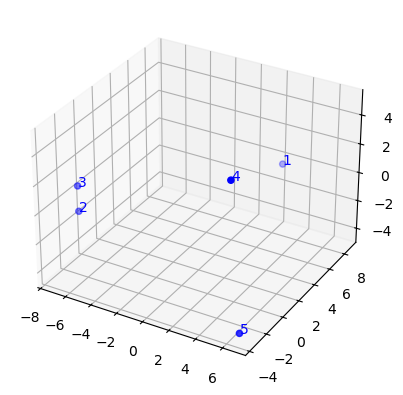

**Similarity between embedding vectors of the word "light" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 6.98

1 and 3: 6.97

1 and 4: 7.75

1 and 5: 7.34

**2 and 3: 12.29**

2 and 4: 6.97

2 and 5: 6.61

3 and 4: 7.04

3 and 5: 6.54

**4 and 5: 10.39**

**Cosine similarity between embedding vectors of the word "light" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.44

1 and 3: 0.43

1 and 4: 0.52

1 and 5: 0.48

**2 and 3: 0.85**

2 and 4: 0.51

2 and 5: 0.47

3 and 4: 0.52

3 and 5: 0.45

**4 and 5: 0.77**

**dog**

1 - Why does a dog sit in the shade? Because it doesn’t want to be a hot dog!
2 - The place makes the best hot dog in town.
3 - I ordered a hot dog with all the toppings from the food truck.
4 - The dog’s bark woke up the entire neighborhood.
5 - The dog ran joyfully in the park, chasing after a ball.



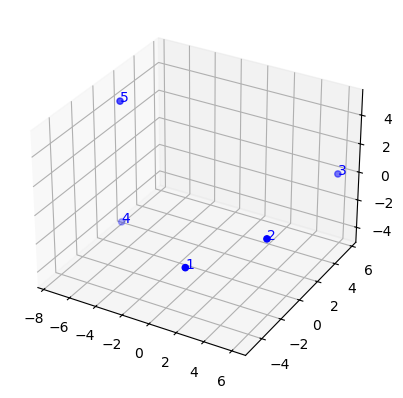

**Similarity between embedding vectors of the word "dog" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 10.78

1 and 3: 8.73

1 and 4: 7.84

1 and 5: 8.17

**2 and 3: 10.12**

2 and 4: 6.66

2 and 5: 7.02

3 and 4: 6.65

3 and 5: 6.85

**4 and 5: 10.36**

**Cosine similarity between embedding vectors of the word "dog" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.77

1 and 3: 0.71

1 and 4: 0.63

1 and 5: 0.62

**2 and 3: 0.79**

2 and 4: 0.49

2 and 5: 0.49

3 and 4: 0.55

3 and 5: 0.55

**4 and 5: 0.80**

**interest**

1 - Why did the bank teller quit his job? He lost interest!
2 - His interest in space travel has always been strong.
3 - She shared his interest in exploring the mysteries of the universe.
4 - Mortgage interest rates have risen in recent months.
5 - The interest on her student loan was much higher than she anticipated.



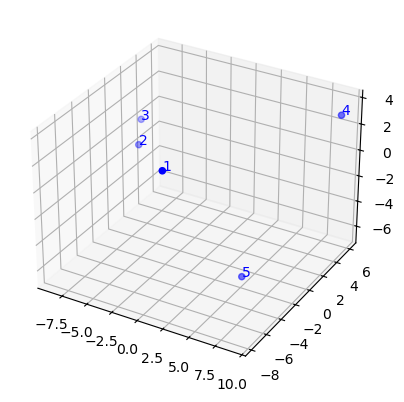

**Similarity between embedding vectors of the word "interest" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 7.13

1 and 3: 6.35

1 and 4: 6.43

1 and 5: 8.08

**2 and 3: 11.39**

2 and 4: 5.60

2 and 5: 6.74

3 and 4: 5.36

3 and 5: 6.12

**4 and 5: 7.75**

**Cosine similarity between embedding vectors of the word "interest" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.47

1 and 3: 0.42

1 and 4: 0.51

1 and 5: 0.63

**2 and 3: 0.82**

2 and 4: 0.32

2 and 5: 0.44

3 and 4: 0.33

3 and 5: 0.41

**4 and 5: 0.68**

**seal**

1 - Why did the seal go to the Tupperware party? It heard it was airtight!
2 - The seal on the letter was very elegant.
3 - The detective inspected the seal carefully for any signs of tampering.
4 - The seal entertained the crowd with its clever tricks.
5 - The playful seal dived into the water, splashing the onlookers.



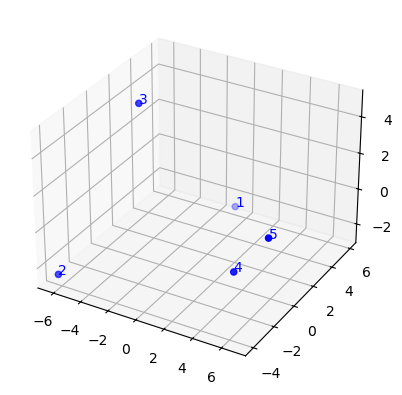

**Similarity between embedding vectors of the word "seal" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 8.81

1 and 3: 10.37

1 and 4: 9.56

1 and 5: 8.75

**2 and 3: 10.66**

2 and 4: 8.12

2 and 5: 7.20

3 and 4: 8.80

3 and 5: 8.01

**4 and 5: 12.16**

**Cosine similarity between embedding vectors of the word "seal" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.64

1 and 3: 0.72

1 and 4: 0.68

1 and 5: 0.60

**2 and 3: 0.77**

2 and 4: 0.61

2 and 5: 0.49

3 and 4: 0.65

3 and 5: 0.56

**4 and 5: 0.81**

**spring**

1 - Why did the mattress start a band? It had excellent spring support!
2 - The spring water was crystal clear and refreshing.
3 - Hikers often stopped at the spring to fill their bottles with fresh water.
4 - I slept on the spring mattress in my grandmother's country house
5 - The spring in the old sofa creaked loudly whenever someone sat down.



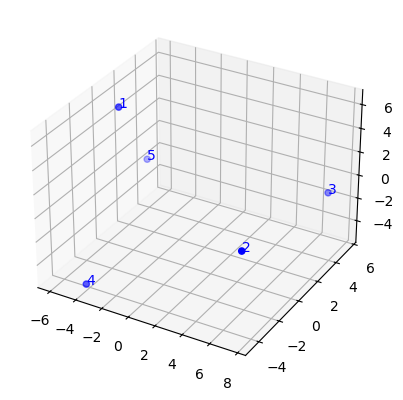

**Similarity between embedding vectors of the word "spring" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 6.60

1 and 3: 6.62

1 and 4: 8.14

1 and 5: 8.42

**2 and 3: 8.07**

2 and 4: 6.81

2 and 5: 6.17

3 and 4: 6.65

3 and 5: 6.57

**4 and 5: 8.18**

**Cosine similarity between embedding vectors of the word "spring" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.49

1 and 3: 0.48

1 and 4: 0.61

1 and 5: 0.61

**2 and 3: 0.69**

2 and 4: 0.53

2 and 5: 0.40

3 and 4: 0.49

3 and 5: 0.45

**4 and 5: 0.60**

**lead**

1 - Why don’t pencils ever win races? They’re always out of lead!
2 - She decided to lead the group through the maze.
3 - The teacher encouraged her to lead the discussion during the class.
4 - The pencil’s lead broke right in the middle of my sketch.
5 - I sharpened the pencil carefully to restore its broken lead.



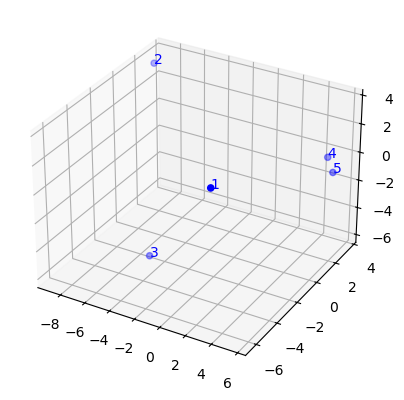

**Similarity between embedding vectors of the word "lead" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 6.63

1 and 3: 7.82

1 and 4: 8.87

1 and 5: 8.98

**2 and 3: 8.55**

2 and 4: 6.77

2 and 5: 6.45

3 and 4: 7.68

3 and 5: 7.50

**4 and 5: 12.10**

**Cosine similarity between embedding vectors of the word "lead" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.36

1 and 3: 0.47

1 and 4: 0.58

1 and 5: 0.59

**2 and 3: 0.64**

2 and 4: 0.42

2 and 5: 0.36

3 and 4: 0.48

3 and 5: 0.45

**4 and 5: 0.79**

**match**

1 - The dating app matched me with a candle who immediately asked for a match.
2 - The football match between the rivals had an electrifying atmosphere.
3 - My daughter is training for an important tennis match.
4 - As I did not have a lighter, I lighted a sigarette with a match.
5 - The match burned my fingers because I wasn't quick enough.



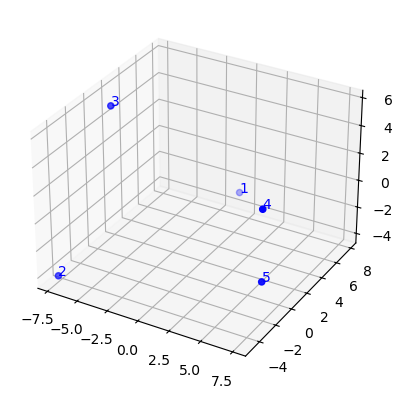

**Similarity between embedding vectors of the word "match" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 7.02

1 and 3: 7.69

1 and 4: 7.24

1 and 5: 7.18

**2 and 3: 8.46**

2 and 4: 6.10

2 and 5: 6.14

3 and 4: 6.47

3 and 5: 6.17

**4 and 5: 9.65**

**Cosine similarity between embedding vectors of the word "match" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.47

1 and 3: 0.51

1 and 4: 0.55

1 and 5: 0.56

**2 and 3: 0.61**

2 and 4: 0.38

2 and 5: 0.41

3 and 4: 0.40

3 and 5: 0.36

**4 and 5: 0.78**

**convert**

1 - Did you know that PDF has become the most widely practiced religion? If you type "How do I convert to" into Google, the top suggestion is PDF—followed by Judaism, Islam, and Christianity.
2 - Recently, he said he wants to convert himself to Judaism.
3 - After years of contemplation, she decided to convert to Buddhism.
4 - Computer question. I have a Word file, how can I convert it to PDF?
5 - The software can easily convert video files into different formats.



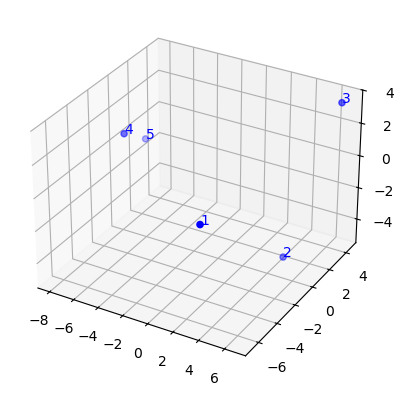

**Similarity between embedding vectors of the word "convert" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 9.83

1 and 3: 8.47

1 and 4: 7.77

1 and 5: 6.79

**2 and 3: 10.72**

2 and 4: 7.49

2 and 5: 7.12

3 and 4: 6.64

3 and 5: 6.42

**4 and 5: 11.47**

**Cosine similarity between embedding vectors of the word "convert" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.73

1 and 3: 0.66

1 and 4: 0.57

1 and 5: 0.44

**2 and 3: 0.77**

2 and 4: 0.51

2 and 5: 0.45

3 and 4: 0.42

3 and 5: 0.38

**4 and 5: 0.80**

In [13]:
for sentences_group in all_sentences:
    word = sentences_group[0]
    printmd ("**"+word+"**")
    sentences = sentences_group[1]
    for i, sentence in enumerate(sentences):
        print (i+1, "-", sentence)
    print ()
    analyse_word_in_sentences(sentences, word)
    print ()

**light**

1 - Why did the photon check a bag at the airport? It didn’t—it was traveling light!
2 - The light from the sunset filled the room with warmth.
3 - The flickering light of the candle created a cozy atmosphere.
4 - The suitcase was so light I thought it was empty.
5 - Even after packing everything I needed, my backpack still felt surprisingly light.



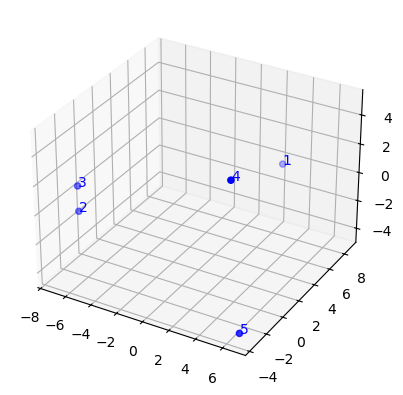

**Similarity between embedding vectors of the word "light" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 6.98

1 and 3: 6.97

1 and 4: 7.75

1 and 5: 7.34

**2 and 3: 12.29**

2 and 4: 6.97

2 and 5: 6.61

3 and 4: 7.04

3 and 5: 6.54

**4 and 5: 10.39**

**Cosine similarity between embedding vectors of the word "light" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.44

1 and 3: 0.43

1 and 4: 0.52

1 and 5: 0.48

**2 and 3: 0.85**

2 and 4: 0.51

2 and 5: 0.47

3 and 4: 0.52

3 and 5: 0.45

**4 and 5: 0.77**

**dog**

1 - Why does a dog sit in the shade? Because it doesn’t want to be a hot dog!
2 - The place makes the best hot dog in town.
3 - I ordered a hot dog with all the toppings from the food truck.
4 - The dog’s bark woke up the entire neighborhood.
5 - The dog ran joyfully in the park, chasing after a ball.



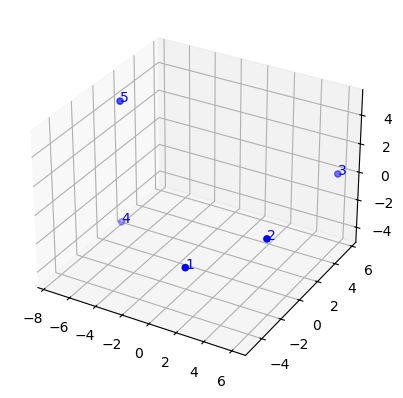

**Similarity between embedding vectors of the word "dog" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 10.78

1 and 3: 8.73

1 and 4: 7.84

1 and 5: 8.17

**2 and 3: 10.12**

2 and 4: 6.66

2 and 5: 7.02

3 and 4: 6.65

3 and 5: 6.85

**4 and 5: 10.36**

**Cosine similarity between embedding vectors of the word "dog" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.77

1 and 3: 0.71

1 and 4: 0.63

1 and 5: 0.62

**2 and 3: 0.79**

2 and 4: 0.49

2 and 5: 0.49

3 and 4: 0.55

3 and 5: 0.55

**4 and 5: 0.80**

**interest**

1 - Why did the bank teller quit his job? He lost interest!
2 - His interest in space travel has always been strong.
3 - She shared his interest in exploring the mysteries of the universe.
4 - Mortgage interest rates have risen in recent months.
5 - The interest on her student loan was much higher than she anticipated.



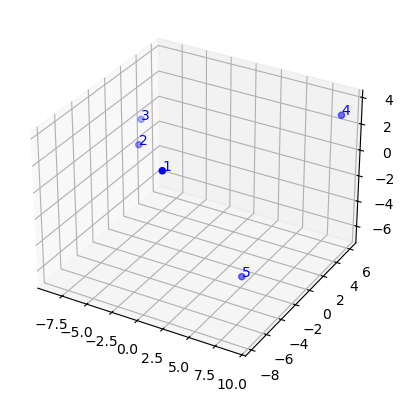

**Similarity between embedding vectors of the word "interest" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 7.13

1 and 3: 6.35

1 and 4: 6.43

1 and 5: 8.08

**2 and 3: 11.39**

2 and 4: 5.60

2 and 5: 6.74

3 and 4: 5.36

3 and 5: 6.12

**4 and 5: 7.75**

**Cosine similarity between embedding vectors of the word "interest" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.47

1 and 3: 0.42

1 and 4: 0.51

1 and 5: 0.63

**2 and 3: 0.82**

2 and 4: 0.32

2 and 5: 0.44

3 and 4: 0.33

3 and 5: 0.41

**4 and 5: 0.68**

**seal**

1 - Why did the seal go to the Tupperware party? It heard it was airtight!
2 - The seal on the letter was very elegant.
3 - The detective inspected the seal carefully for any signs of tampering.
4 - The seal entertained the crowd with its clever tricks.
5 - The playful seal dived into the water, splashing the onlookers.



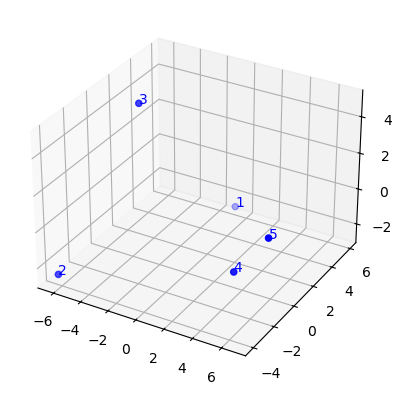

**Similarity between embedding vectors of the word "seal" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 8.81

1 and 3: 10.37

1 and 4: 9.56

1 and 5: 8.75

**2 and 3: 10.66**

2 and 4: 8.12

2 and 5: 7.20

3 and 4: 8.80

3 and 5: 8.01

**4 and 5: 12.16**

**Cosine similarity between embedding vectors of the word "seal" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.64

1 and 3: 0.72

1 and 4: 0.68

1 and 5: 0.60

**2 and 3: 0.77**

2 and 4: 0.61

2 and 5: 0.49

3 and 4: 0.65

3 and 5: 0.56

**4 and 5: 0.81**

**spring**

1 - Why did the mattress start a band? It had excellent spring support!
2 - The spring water was crystal clear and refreshing.
3 - Hikers often stopped at the spring to fill their bottles with fresh water.
4 - I slept on the spring mattress in my grandmother's country house
5 - The spring in the old sofa creaked loudly whenever someone sat down.



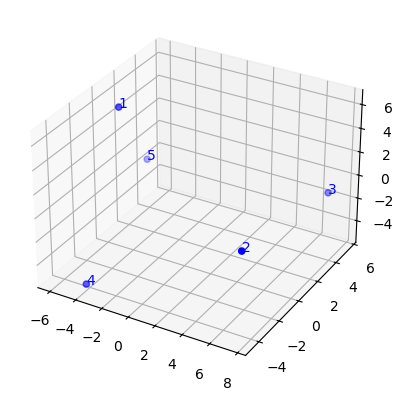

**Similarity between embedding vectors of the word "spring" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 6.60

1 and 3: 6.62

1 and 4: 8.14

1 and 5: 8.42

**2 and 3: 8.07**

2 and 4: 6.81

2 and 5: 6.17

3 and 4: 6.65

3 and 5: 6.57

**4 and 5: 8.18**

**Cosine similarity between embedding vectors of the word "spring" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.49

1 and 3: 0.48

1 and 4: 0.61

1 and 5: 0.61

**2 and 3: 0.69**

2 and 4: 0.53

2 and 5: 0.40

3 and 4: 0.49

3 and 5: 0.45

**4 and 5: 0.60**

**lead**

1 - Why don’t pencils ever win races? They’re always out of lead!
2 - She decided to lead the group through the maze.
3 - The teacher encouraged her to lead the discussion during the class.
4 - The pencil’s lead broke right in the middle of my sketch.
5 - I sharpened the pencil carefully to restore its broken lead.



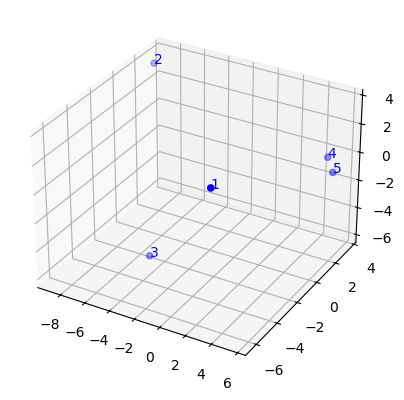

**Similarity between embedding vectors of the word "lead" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 6.63

1 and 3: 7.82

1 and 4: 8.87

1 and 5: 8.98

**2 and 3: 8.55**

2 and 4: 6.77

2 and 5: 6.45

3 and 4: 7.68

3 and 5: 7.50

**4 and 5: 12.10**

**Cosine similarity between embedding vectors of the word "lead" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.36

1 and 3: 0.47

1 and 4: 0.58

1 and 5: 0.59

**2 and 3: 0.64**

2 and 4: 0.42

2 and 5: 0.36

3 and 4: 0.48

3 and 5: 0.45

**4 and 5: 0.79**

**match**

1 - The dating app matched me with a candle who immediately asked for a match.
2 - The football match between the rivals had an electrifying atmosphere.
3 - My daughter is training for an important tennis match.
4 - As I did not have a lighter, I lighted a sigarette with a match.
5 - The match burned my fingers because I wasn't quick enough.



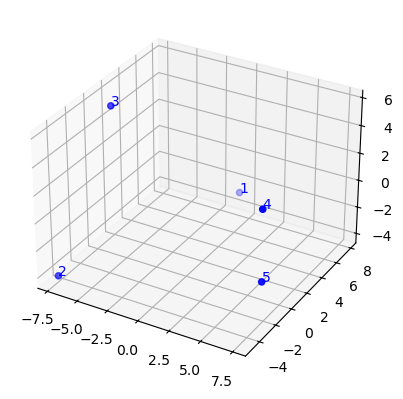

**Similarity between embedding vectors of the word "match" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 7.02

1 and 3: 7.69

1 and 4: 7.24

1 and 5: 7.18

**2 and 3: 8.46**

2 and 4: 6.10

2 and 5: 6.14

3 and 4: 6.47

3 and 5: 6.17

**4 and 5: 9.65**

**Cosine similarity between embedding vectors of the word "match" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.47

1 and 3: 0.51

1 and 4: 0.55

1 and 5: 0.56

**2 and 3: 0.61**

2 and 4: 0.38

2 and 5: 0.41

3 and 4: 0.40

3 and 5: 0.36

**4 and 5: 0.78**

**convert**

1 - Did you know that PDF has become the most widely practiced religion? If you type "How do I convert to" into Google, the top suggestion is PDF—followed by Judaism, Islam, and Christianity.
2 - Recently, he said he wants to convert himself to Judaism.
3 - After years of contemplation, she decided to convert to Buddhism.
4 - Computer question. I have a Word file, how can I convert it to PDF?
5 - The software can easily convert video files into different formats.



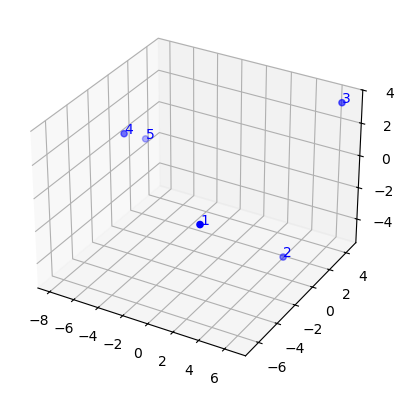

**Similarity between embedding vectors of the word "convert" (based on opposite of Euclidean distance) in sentences:**

1 and 2: 9.83

1 and 3: 8.47

1 and 4: 7.77

1 and 5: 6.79

**2 and 3: 10.72**

2 and 4: 7.49

2 and 5: 7.12

3 and 4: 6.64

3 and 5: 6.42

**4 and 5: 11.47**

**Cosine similarity between embedding vectors of the word "convert" (range: -1 for opposite meaning, +1 for very similar) in sentences:**

1 and 2: 0.73

1 and 3: 0.66

1 and 4: 0.57

1 and 5: 0.44

**2 and 3: 0.77**

2 and 4: 0.51

2 and 5: 0.45

3 and 4: 0.42

3 and 5: 0.38

**4 and 5: 0.80**

In [13]:
for sentences_group in all_sentences:
    word = sentences_group[0]
    printmd ("**"+word+"**")
    sentences = sentences_group[1]
    for i, sentence in enumerate(sentences):
        print (i+1, "-", sentence)
    print ()
    analyse_word_in_sentences(sentences, word)
    print ()